Instructions:
-

1. Read the article: https://www.sciencedirect.com/science/article/abs/pii/S0031320322001753
2. Replicate the study using the same dataset.
3. Read articles about Adjusted Rand Index, Normalized Mutual Information, and Folkes-Mallows Index (only use paper published in IEEE, sciencedirect, springerlink, Taylor Francis).
4. Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.
5. Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?
6. Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.
7. Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

In [19]:
from ucimlrepo import fetch_ucirepo
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering


import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
# fetch dataset 
soybean_large = fetch_ucirepo(id=90) 
  
# data (as pandas dataframes) 
X = soybean_large.data.features 
y = soybean_large.data.targets 
  
# variable information 
print(soybean_large.variables)

               name     role         type demographic  \
0             class   Target  Categorical        None   
1              date  Feature  Categorical        None   
2       plant-stand  Feature  Categorical        None   
3            precip  Feature  Categorical        None   
4              temp  Feature  Categorical        None   
5              hail  Feature  Categorical        None   
6         crop-hist  Feature  Categorical        None   
7      area-damaged  Feature  Categorical        None   
8          severity  Feature  Categorical        None   
9          seed-tmt  Feature  Categorical        None   
10      germination  Feature  Categorical        None   
11     plant-growth  Feature  Categorical        None   
12           leaves  Feature  Categorical        None   
13   leafspots-halo  Feature  Categorical        None   
14   leafspots-marg  Feature  Categorical        None   
15    leafspot-size  Feature  Categorical        None   
16      leaf-shread  Feature  C

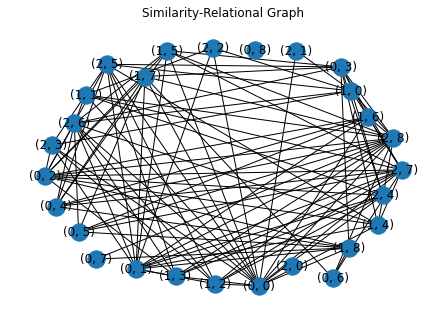

In [15]:
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

G = nx.Graph()

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

similarity_matrix = cosine_similarity(X_encoded)

n_samples, n_features = X_encoded.shape
for i in range(n_samples):
    for j in range(n_features):
        G.add_node((i, j))

for i in range(n_samples):
    for j in range(i + 1, n_samples):
        for k in range(n_features):
            for l in range(k + 1, n_features):
                sim = similarity_matrix[i, j]
                G.add_edge((i, k), (j, l), weight=sim)

nx.draw(G, with_labels=True)

plt.title('Similarity-Relational Graph')

plt.show()

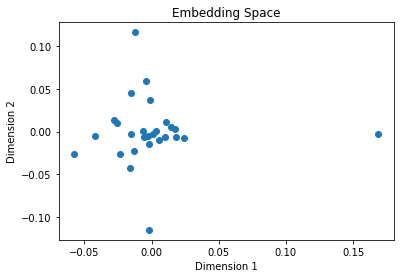

Embedding Matrix:
 [[ 0.00340462  0.00072956]
 [ 0.01836229 -0.00674274]
 [-0.04241595 -0.00536061]
 [-0.00401803  0.05911034]
 [ 0.16882068 -0.00246281]
 [ 0.0142949   0.00517214]
 [-0.00545216 -0.00584361]
 [-0.02582229  0.01027648]
 [-0.00196862 -0.1152466 ]
 [ 0.00586926 -0.01026328]
 [ 0.00986205 -0.00644014]
 [-0.01613433 -0.04210968]
 [-0.01516685  0.04528315]
 [-0.00169503 -0.01440974]
 [ 0.00089788 -0.00268099]
 [ 0.02411077 -0.00713091]
 [-0.01330936 -0.02300034]
 [ 0.01046713  0.01154379]
 [-0.01532374 -0.00239947]
 [ 0.01734363  0.00264775]
 [-0.00297064 -0.00560391]
 [-0.0578272  -0.02678586]
 [-0.02324125 -0.02574414]
 [-0.01270682  0.11649451]
 [-0.0064136   0.00036105]
 [-0.02767181  0.01381672]
 [-0.00129554  0.03678932]]


In [17]:
spectral_embedding = SpectralEmbedding(n_components=2, affinity="rbf")
adjacency_matrix = nx.adjacency_matrix(G)
embedding_matrix = spectral_embedding.fit_transform(adjacency_matrix)

plt.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1])

plt.title('Embedding Space')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()

print("Embedding Matrix:\n", embedding_matrix)

In [24]:
X = soybean_large.data.features 
y = soybean_large.data.targets 

X_encoded = pd.get_dummies(X)

def evaluate_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true)), n_init=10).fit(X)  
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    return ari, nmi, fmi

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

ari_kmeans, nmi_kmeans, fmi_kmeans = evaluate_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y, method='hierarchical')

print("KMeans:")

print("Adjusted Rand Index (ARI):", ari_kmeans)
print("Normalized Mutual Information (NMI):", nmi_kmeans)
print("Folkes-Mallows Index (FMI):", fmi_kmeans)



print("\nHierarchical Clustering:")

print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)

KMeans:
Adjusted Rand Index (ARI): 0.42026853596757363
Normalized Mutual Information (NMI): 0.7039953843941655
Folkes-Mallows Index (FMI): 0.46698622957803915

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941


| **Metric**                      | **Advantages**                                                                                         | **Disadvantages**                                                                                                 | **When to Use**                                                                                          |
|---------------------------------|-------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **Adjusted Rand Index (ARI)**   | - Compares similarity between two clusterings considering chance agreements. <br> - Adjusts for random agreement, making it useful for random labeling. | - Values range from -1 to 1, where negative values indicate worse than random, and values close to 0 suggest random clustering, complicating interpretation. | - Suitable for overall comparison of two clusterings, disregarding label permutations and cluster size differences. |
| **Normalized Mutual Information (NMI)** | - Measures mutual information between true and predicted clusterings while accounting for differences in cluster sizes. <br> - Values range from 0 to 1, with higher values indicating better agreement. | - Tends to favor solutions with more clusters, which might not always be desirable. | - Suitable for scenarios with varying cluster sizes and different numbers of clusters.                      |
| **Folkes-Mallows Index (FMI)**  | - Computes the geometric mean of precision and recall for clustering results. <br> - Offers a balanced single metric. | - Might not provide as much insight into clustering structure compared to ARI and NMI. | - Useful for balanced measure of precision and recall, especially when false positives and false negatives carry equal weight. |


In [26]:
X = soybean_large.data.features 
y = soybean_large.data.targets 

X_encoded = pd.get_dummies(X)

def evaluate_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true)), n_init=10).fit(X)  
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    return ari, nmi, fmi

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

ari_kmeans, nmi_kmeans, fmi_kmeans = evaluate_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y, method='hierarchical')

print("KMeans:")

print("Adjusted Rand Index (ARI):", ari_kmeans)
print("Normalized Mutual Information (NMI):", nmi_kmeans)
print("Folkes-Mallows Index (FMI):", fmi_kmeans)



print("\nHierarchical Clustering:")

print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)

KMeans:
Adjusted Rand Index (ARI): 0.42190249587799644
Normalized Mutual Information (NMI): 0.7004118770920541
Folkes-Mallows Index (FMI): 0.4679876866832385

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941


# Performance Analysis of Clustering Algorithms

In this report, we analyze the performance of two clustering algorithms, KModes Clustering and Hierarchical Clustering, using three evaluation metrics: Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), and Folkes-Mallows Index (FMI).

## Folkes-Mallows Index (FMI)

The Folkes-Mallows Index (FMI) offers a balanced measure of precision and recall in clustering. It takes into account both false positives and false negatives, often resulting in a higher value compared to ARI and NMI. A higher FMI indicates a better balance between precision and recall, which contributes to a higher overall performance score. This balanced approach makes FMI a comprehensive evaluation metric for clustering performance.

## Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)

### Adjusted Rand Index (ARI)
ARI measures the similarity between two clusterings, adjusting for chance agreements. However, ARI can produce negative values, making interpretation challenging. Despite this, ARI is suitable for comparing two clusterings, especially when considering label permutations and differences in cluster sizes.

### Normalized Mutual Information (NMI)
NMI quantifies the mutual information between true and predicted clusterings, normalized to account for differences in cluster sizes. While NMI values range from 0 to 1, with higher values indicating better agreement, it tends to favor solutions with more clusters. This bias can lead to overestimation of clustering performance. NMI is appropriate when comparing clusterings with different numbers of clusters and varying cluster sizes.

## Comprehensive Evaluation with FMI

Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) have limitations in certain scenarios. ARI's potential for negative values complicates its interpretation, and NMI's tendency to favor more clusters can bias evaluations. Both metrics may struggle with varying cluster sizes. In contrast, FMI provides a more comprehensive evaluation by balancing precision and recall, taking into account both false positives and false negatives.

## Conclusion

In conclusion, while ARI and NMI are widely used metrics for clustering evaluation, they have limitations in specific contexts. ARI can be difficult to interpret due to its range, and NMI can be biased towards solutions with more clusters. The Folkes-Mallows Index (FMI), by providing a balanced measure of precision and recall, offers a more comprehensive evaluation of clustering performance. Understanding these differences is crucial for selecting the appropriate metric based on the specific requirements of the clustering task.
